In [1]:
import music21 as m21

In [2]:
function = lambda x : x**2

In [3]:
function(2)

4

In [4]:
myList = [-1, 0, 1, 2 , 3]

In [7]:
myListSorted = sorted(myList, key=lambda x:x**2)
print(myListSorted)

[0, -1, 1, 2, 3]


In [11]:
myListSorted2 = [("a", 1), ("b", 2), ("c", 3), ("d", 0)]
myListSorted2 = sorted(myListSorted2, key=lambda x : x[1])
print(myListSorted2)

[('d', 0), ('a', 1), ('b', 2), ('c', 3)]


In [12]:
tristanChord = m21.chord.Chord(["F4", "B4", "D#4", "G#4"])

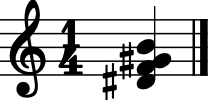

In [13]:
tristanChord.show()

In [14]:
tristanChord.commonName

'enharmonic equivalent to half-diminished seventh chord'

In [15]:
tristanChord.pitchedCommonName

'enharmonic equivalent to half-diminished seventh chord above D#'

In [16]:
tristanChord.root()

<music21.pitch.Pitch G#4>

In [18]:
tristanChord.bass()

<music21.pitch.Pitch D#4>

In [34]:
"D+4" in tristanChord #joa

False

In [19]:
tristanChord.isMajorTriad()

False

In [20]:
dir(tristanChord)

['_DOC_ATTR',
 '_DOC_ORDER',
 '__annotations__',
 '__class__',
 '__deepcopy__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__firstlineno__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setitem__',
 '__setstate__',
 '__sizeof__',
 '__slots__',
 '__static_attributes__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_activeSite',
 '_activeSiteStoredOffset',
 '_add_core_or_init',
 '_cache',
 '_checkTriadType',
 '_chordAttached',
 '_classSetCacheDict',
 '_classTupleCacheDict',
 '_deepcopySubclassable',
 '_derivation',
 '_duration',
 '_editorial',
 '_findBass',
 '_findInversion',
 '_findRoot',
 '_getActiveSite',
 '_getMeasureOffset',
 '_getPriority',
 '_getSeconds',
 '_getTimeSignatureForBeat',
 '_getVolume',
 '_id',
 '_is

In [24]:
tristanChord.isChord

True

In [25]:
myScore = m21.converter.parse("cmf1_woche03_beispiel.mxl")

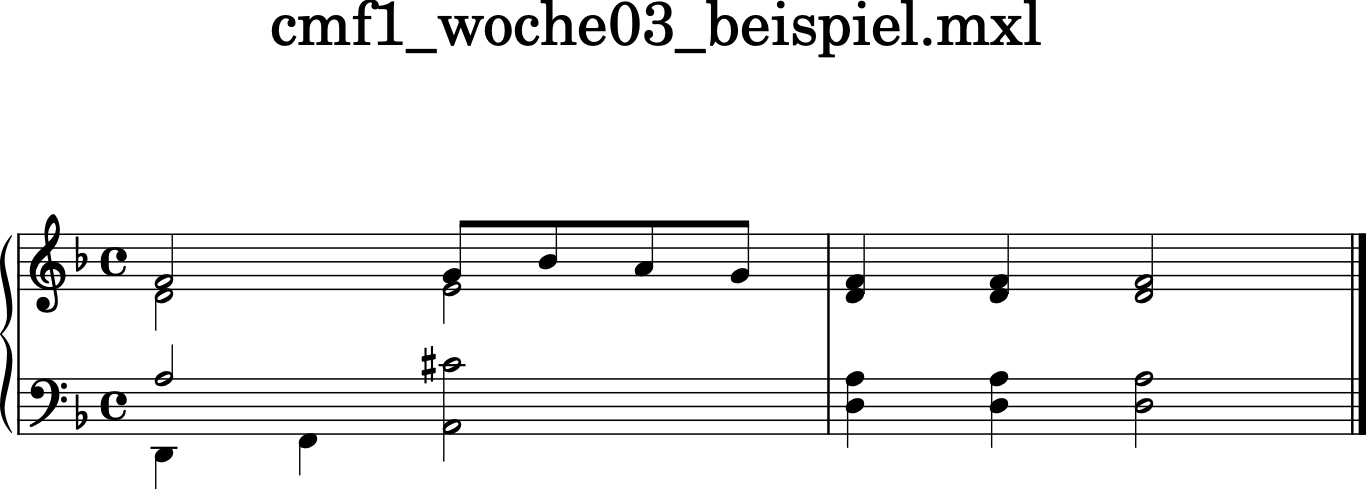

In [29]:
myScore.show()

In [30]:
myScoreChordifyed = myScore.chordify()

In [32]:
myScoreChordifyed.show("text")

{0.0} <music21.metadata.Metadata object at 0x1287d6210>
{0.0} <music21.instrument.Piano 'P1: Klavier: Klavier'>
{0.0} <music21.stream.Measure 1 offset=0.0>
    {0.0} <music21.layout.SystemLayout>
    {0.0} <music21.clef.TrebleClef>
    {0.0} <music21.key.KeySignature of 1 flat>
    {0.0} <music21.meter.TimeSignature 4/4>
    {0.0} <music21.chord.Chord D2 A3 D4 F4>
    {1.0} <music21.chord.Chord F2 A3 D4 F4>
    {2.0} <music21.chord.Chord A2 C#4 E4 G4>
    {2.5} <music21.chord.Chord A2 C#4 E4 B-4>
    {3.0} <music21.chord.Chord A2 C#4 E4 A4>
    {3.5} <music21.chord.Chord A2 C#4 E4 G4>
{4.0} <music21.stream.Measure 2 offset=4.0>
    {0.0} <music21.chord.Chord D3 A3 D4 F4>
    {1.0} <music21.chord.Chord D3 A3 D4 F4>
    {2.0} <music21.chord.Chord D3 A3 D4 F4>
    {4.0} <music21.bar.Barline type=final>


In [37]:
myKey = myScore.analyze("key") #Krumhansl-Schmuckler-Alogorithmus
print(myKey)

d minor


In [38]:
type(myKey)

music21.key.Key

In [39]:
myKey.tonic

<music21.pitch.Pitch D>

In [41]:
cMajorKey = m21.key.Key("C") #gr/kl für Dur/Moll
print(cMajorKey)

C major


In [43]:
fMajTri = m21.chord.Chord(["F3", "C4", "A4"])

In [48]:
chordLabel = m21.roman.romanNumeralFromChord(fMajTri, cMajorKey)
print(chordLabel)
chordLabel.figure

<music21.roman.RomanNumeral IV in C major>


'IV'

In [52]:
someChord = m21.roman.RomanNumeral("V6", cMajorKey)
someChord
someChord.pitches

(<music21.pitch.Pitch B4>, <music21.pitch.Pitch D5>, <music21.pitch.Pitch G5>)

# Wie viele Moll Werke im Bach-Korpus enden mit einer Picardischen Terz?

In [62]:
import music21 as m21

In [65]:
bachCorpus = m21.corpus.search("bach", fileExtensions="xml")

In [67]:
minorScores = []
for piece in bachCorpus:
    pieceScore = piece.parse()
    if pieceScore.analyze("key").mode == "minor":
        minorScores.append(pieceScore)

In [73]:
print(len(bachCorpus), len(minorScores))

412 191


In [76]:
chordifiedScoresMinor = []
for score in minorScores:
    chordifiedScoresMinor.append(score.chordify())

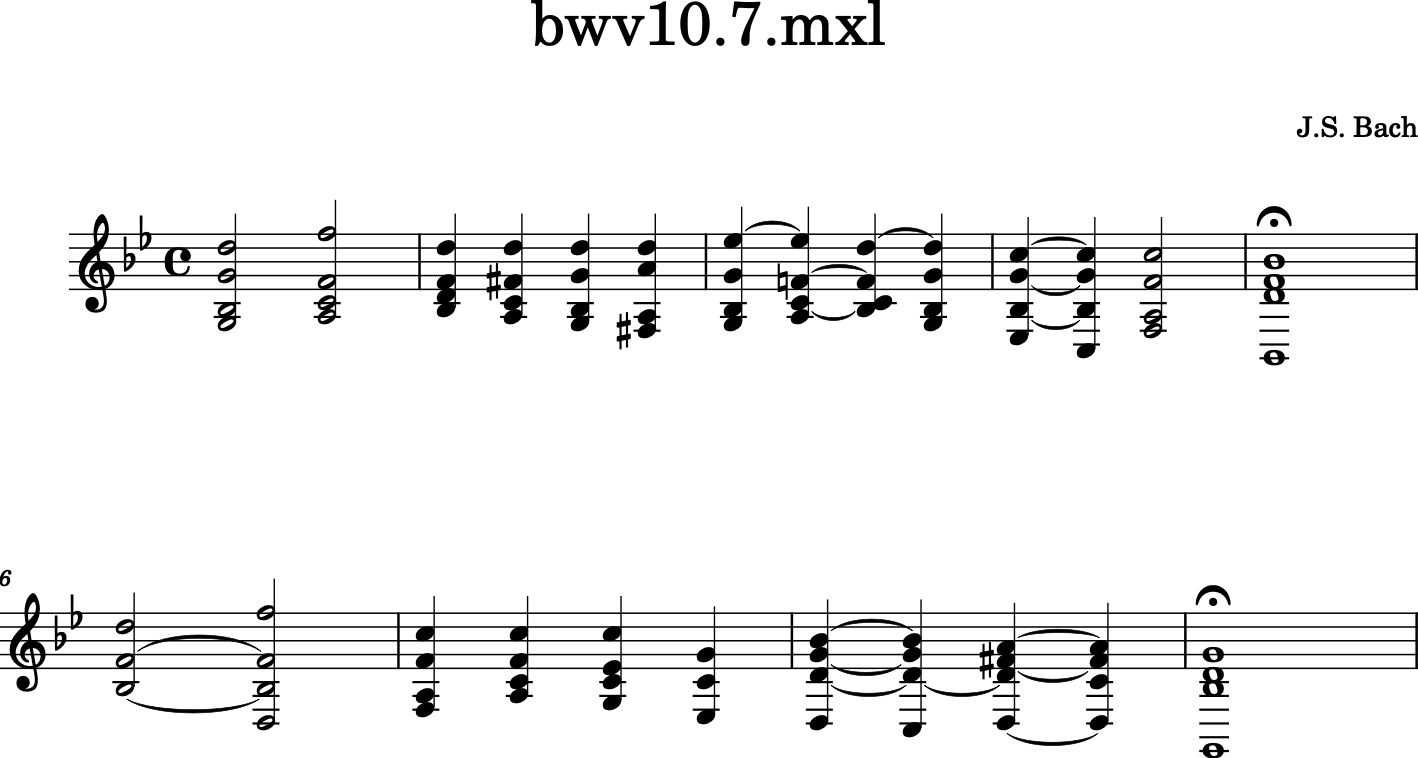

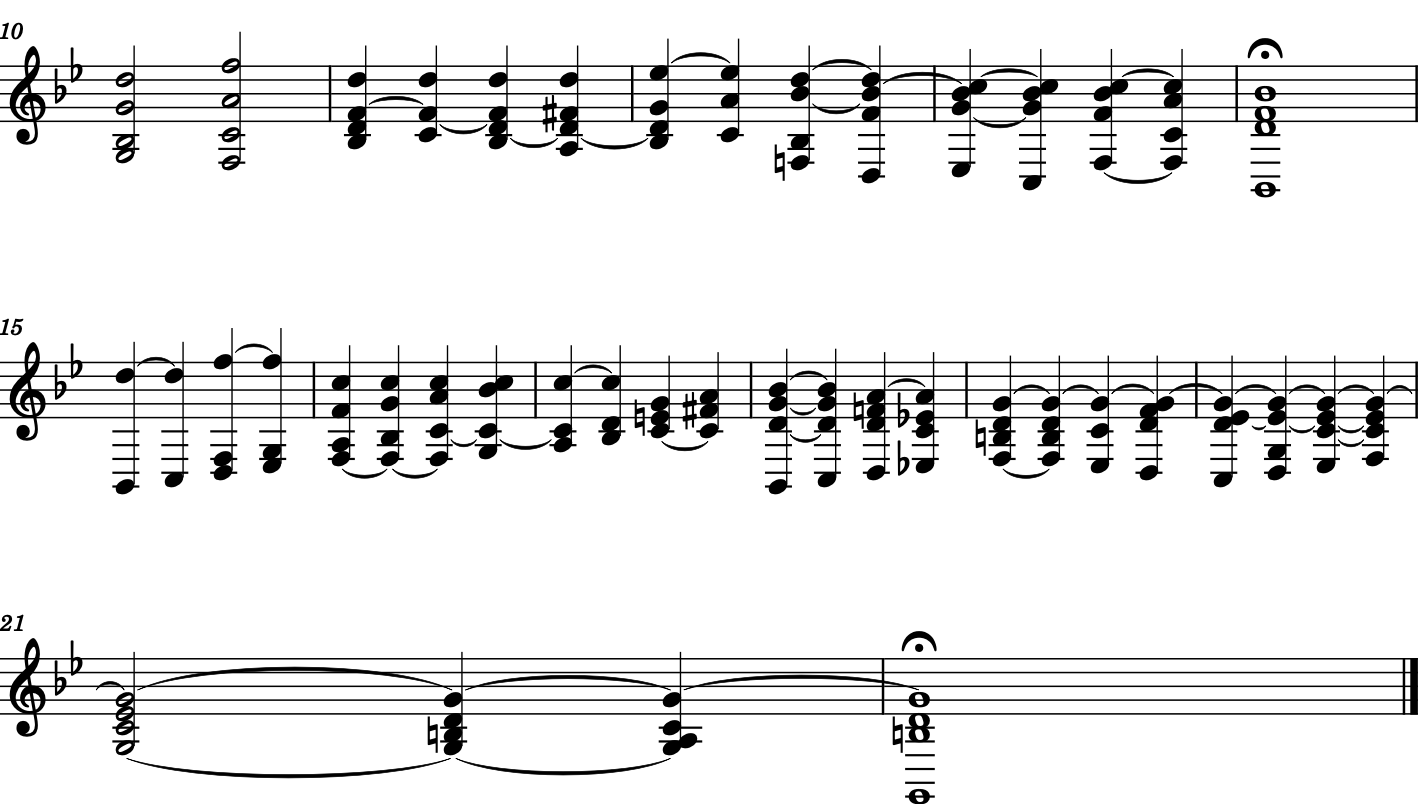

In [82]:
chordifiedScoresMinor[0].show()

In [92]:
piecesWithPicardyThird = []
for score in chordifiedScoresMinor:
    scoreChords = score.flatten().getElementsByClass(m21.chord.Chord)
    if scoreChords[-1].commonName == "major triad":
        piecesWithPicardyThird.append(score)

In [93]:
len(piecesWithPicardyThird)

175

### Häufigster Akkord == Tonart??

In [97]:
import music21 as m21
from collections import Counter

In [99]:
bachCorpus = m21.corpus.search("bach", fileExtensions="xml")

In [111]:
def chordCounter(piece):
    score = piece.parse()
    chordifiedScore = score.chordify()
    scoreChords = chordifiedScore.recurse().getElementsByClass(m21.chord.Chord)
    scoreChordsNames = []
    for chord in scoreChords:
        scoreChordsNames.append(chord.root().name + " " + chord.quality)
    return sorted(list(Counter(scoreChordsNames).items()), key=lambda x : x[1], reverse = True)


In [112]:
chordCounter(bachCorpus[0])

[('F major', 45),
 ('C major', 42),
 ('B- major', 19),
 ('D minor', 14),
 ('G minor', 11),
 ('E diminished', 8),
 ('A minor', 8),
 ('G major', 6),
 ('F other', 4),
 ('B diminished', 2),
 ('D other', 1),
 ('B- other', 1)]

In [118]:
keyList = []
for i, piece in enumerate(bachCorpus[:10]):
    score = piece.parse()
    key = score.analyze("key")
    keyList.append(key)

In [119]:
comparisionList=[]
for i in len(keyList):
    comparisionList.append(keyList[i] == chordCounter(bachCorpus[i])[0])
Counter(comparisionList)

TypeError: 'int' object is not iterable